In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# GFP

In [2]:
# Load the two CSV files
df1 = pd.read_csv('/pmglocal/ty2514/Enhancer/Enhancer/data/ExplaiNN3_GFP/ExplaiNN3_GFP_Metrics.csv')
df2 = pd.read_csv('/pmglocal/ty2514/Enhancer/Enhancer/data/ExplaiNN3_GFP2/ExplaiNN3_GFP_Metrics.csv')

# Concatenate the dataframes along the rows
combined_df = pd.concat([df1, df2], ignore_index=True)
combined_df.to_csv('/pmglocal/ty2514/Enhancer/Enhancer/data/ExplaiNN3_GFP/combined.csv', index=False)


In [3]:
combined_df

,num_cnns,batch,lr,drop_out,seed,mse_p,rmse_p,mae_p,r2_p,pearson_corr_p,spearman_corr_p,mse_r,rmse_r,mae_r,r2_r,pearson_corr_r,spearman_corr_r,best_pearson_epoch,best_r2_epoch
0,10,96,0.0001,0.3,995,0.046433,0.215482,0.163993,0.381900,0.620962,0.549648,0.046408,0.215426,0.164433,0.382226,0.619396,0.549942,55,48
1,10,96,0.0005,0.3,995,0.047214,0.217287,0.166307,0.371504,0.618295,0.544400,0.046925,0.216621,0.165473,0.375352,0.615995,0.544938,6,1
2,10,96,0.0010,0.3,995,0.049720,0.222981,0.169753,0.338135,0.602199,0.536459,0.048468,0.220155,0.168393,0.354805,0.606344,0.535957,2,1
3,20,96,0.0001,0.3,995,0.047121,0.217074,0.165845,0.372733,0.615612,0.544345,0.046979,0.216747,0.165309,0.374623,0.615596,0.548479,47,36
4,20,96,0.0005,0.3,995,0.048163,0.219461,0.166918,0.358862,0.614996,0.545528,0.047602,0.218178,0.166856,0.366337,0.611205,0.533753,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,115,168,0.0005,0.3,566,0.050427,0.224560,0.172425,0.346254,0.606645,0.531508,0.050427,0.224560,0.172425,0.346254,0.606645,0.531508,4,4
464,115,168,0.0010,0.3,566,0.052898,0.229995,0.175446,0.314226,0.587555,0.507070,0.050958,0.225738,0.171598,0.339375,0.595939,0.516306,4,6
465,125,168,0.0001,0.3,566,0.047819,0.218677,0.166805,0.380059,0.621069,0.540474,0.047562,0.218087,0.166388,0.383400,0.623287,0.545439,34,33
466,125,168,0.0005,0.3,566,0.050723,0.225219,0.171153,0.342411,0.606584,0.532119,0.050700,0.225166,0.172886,0.342718,0.598612,0.520259,4,2


In [4]:
df_conv = pd.read_csv('/pmglocal/ty2514/Enhancer/Enhancer/data/ConvNetDeep_GFP/ConvNetDeep_GFP_Metrics.csv')
df_dan = pd.read_csv('/pmglocal/ty2514/Enhancer/Enhancer/data/DanQ_GFP/DanQ_GFP_Metrics.csv')
df_starr = pd.read_csv('/pmglocal/ty2514/Enhancer/Enhancer/data/DeepSTARR_GFP/DeepSTARR_GFP_Metrics.csv')
df_explain = pd.read_csv('/pmglocal/ty2514/Enhancer/Enhancer/data/ExplaiNN3_GFP/ExplaiNN3_GFP_Metrics.csv')
df_explain.columns


Index(['num_cnns', 'batch', 'lr', 'drop_out', 'seed', 'mse_p', 'rmse_p',
       'mae_p', 'r2_p', 'pearson_corr_p', 'spearman_corr_p', 'mse_r', 'rmse_r',
       'mae_r', 'r2_r', 'pearson_corr_r', 'spearman_corr_r',
       'best_pearson_epoch', 'best_r2_epoch'],
      dtype='object')

In [5]:
# Function to calculate the highest mean r2_r for each num_cnns
def calculate_highest_mean_explain(df, metric):
    grouped = df.groupby(['num_cnns', 'batch', 'lr']).agg(mean_metric=(metric, 'mean')).reset_index()
    return grouped.groupby('num_cnns')['mean_metric'].max()

# Function to calculate the highest mean r2_r for dataframes without num_cnns
def calculate_highest_mean_others(df, metric):
    grouped = df.groupby(['batch', 'lr']).agg(mean_metric=(metric, 'mean')).reset_index()
    return grouped['mean_metric'].max()

# Assuming the calculation functions and data frame preparations are already defined
# as provided in your previous messages

# Apply the function to df_explain and other data frames
df_explain_highest = calculate_highest_mean_explain(df_explain,'r2_r')
max_r2_conv = calculate_highest_mean_others(df_conv,'r2_r')
max_r2_dan = calculate_highest_mean_others(df_dan,'r2_r')
max_r2_starr = calculate_highest_mean_others(df_starr,'r2_r')


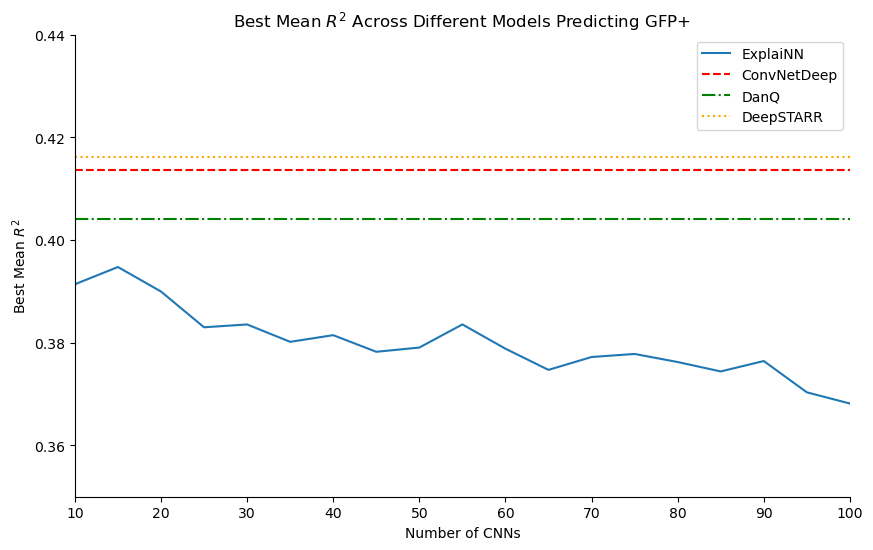

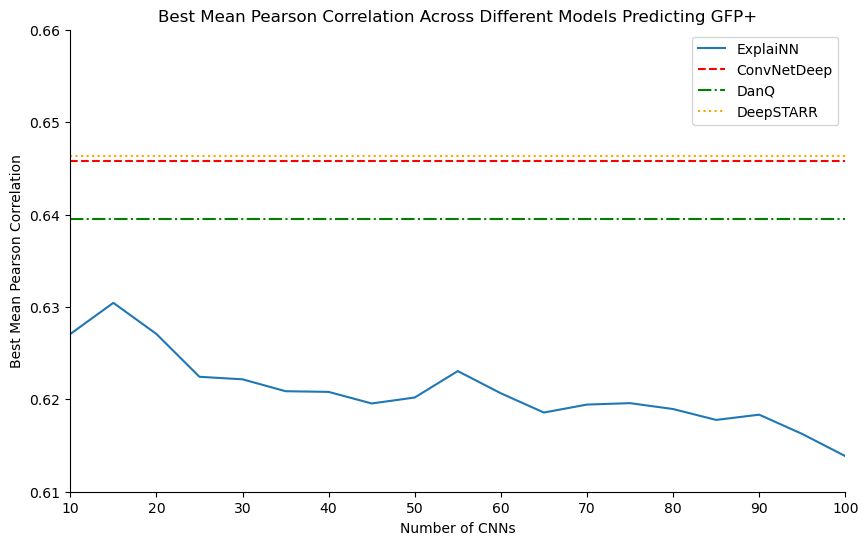

In [11]:
# Function to calculate the highest mean r2_r for each num_cnns
def calculate_highest_mean_explain(df, metric):
    grouped = df.groupby(['num_cnns', 'batch', 'lr']).agg(mean_metric=(metric, 'mean')).reset_index()
    return grouped.groupby('num_cnns')['mean_metric'].max()

# Function to calculate the highest mean r2_r for dataframes without num_cnns
def calculate_highest_mean_others(df, metric):
    grouped = df.groupby(['batch', 'lr']).agg(mean_metric=(metric, 'mean')).reset_index()
    return grouped['mean_metric'].max()

# Assuming the calculation functions and data frame preparations are already defined
# as provided in your previous messages

# Apply the function to df_explain and other data frames
df_explain_highest = calculate_highest_mean_explain(df_explain,'r2_r')
max_r2_conv = calculate_highest_mean_others(df_conv,'r2_r')
max_r2_dan = calculate_highest_mean_others(df_dan,'r2_r')
max_r2_starr = calculate_highest_mean_others(df_starr,'r2_r')

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_explain_highest.index, df_explain_highest.values, label='ExplaiNN', linestyle='-', markersize=3)
plt.axhline(y=max_r2_conv, color='red', linestyle='--', label='ConvNetDeep')
plt.axhline(y=max_r2_dan, color='green', linestyle='-.', label='DanQ')
plt.axhline(y=max_r2_starr, color='orange', linestyle=':', label='DeepSTARR')

plt.title('Best Mean $R^2$ Across Different Models Predicting GFP+')
plt.xlabel('Number of CNNs')
plt.ylabel('Best Mean $R^2$')
plt.legend()
plt.grid(False)  # Disable the grid
plt.gca().set_facecolor('white')  # Set background to white
plt.xlim(10,100)  # Set x-axis limits
plt.ylim(0.35, 0.44)  # Set y-axis limits

# Remove the top and right spines (borders)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

# Apply the function to df_explain and other data frames
df_explain_highest = calculate_highest_mean_explain(df_explain,'pearson_corr_r')
max_pearson_conv = calculate_highest_mean_others(df_conv,'pearson_corr_r')
max_pearson_dan = calculate_highest_mean_others(df_dan,'pearson_corr_r')
max_pearson_starr = calculate_highest_mean_others(df_starr,'pearson_corr_r')

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_explain_highest.index, df_explain_highest.values, label='ExplaiNN', linestyle='-', markersize=3)
plt.axhline(y=max_pearson_conv, color='red', linestyle='--', label='ConvNetDeep')
plt.axhline(y=max_pearson_dan, color='green', linestyle='-.', label='DanQ')
plt.axhline(y=max_pearson_starr, color='orange', linestyle=':', label='DeepSTARR')

plt.title('Best Mean Pearson Correlation Across Different Models Predicting GFP+')
plt.xlabel('Number of CNNs')
plt.ylabel('Best Mean Pearson Correlation')
plt.legend()
plt.grid(False)  # Disable the grid
plt.gca().set_facecolor('white')  # Set background to white
plt.xlim(10,100)  # Set x-axis limits
plt.ylim(0.61, 0.66)  # Set y-axis limits

# Remove the top and right spines (borders)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

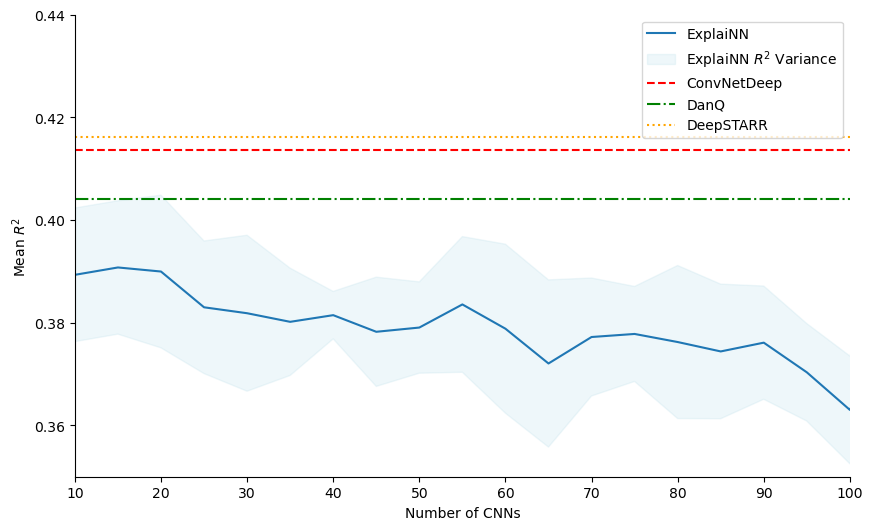

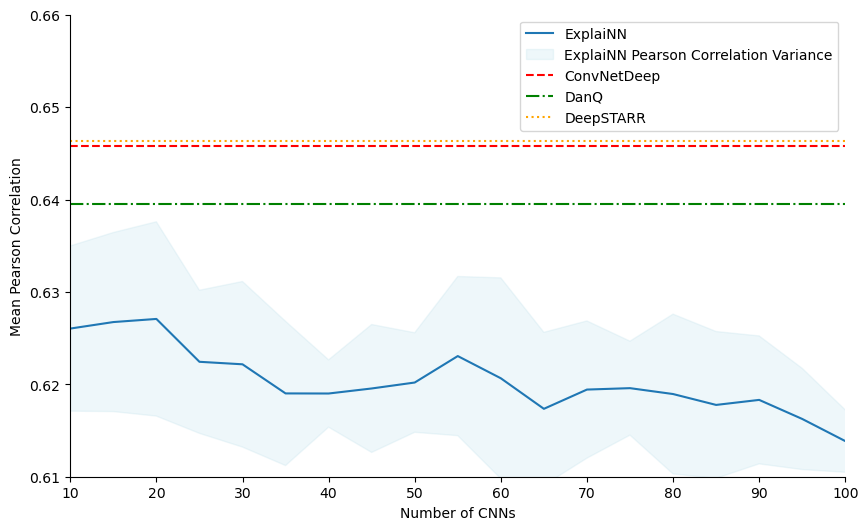

In [12]:
# Assuming your dataframe is named df_explain and it's already loaded

# Function to find the best combination of 'batch' and 'lr' for each 'num_cnns'
def find_best_combinations(df, metric):
    best_combinations = []
    for num_cnn in df['num_cnns'].unique():
        subset = df[df['num_cnns'] == num_cnn]
        subset = subset[subset[metric] > 0]  # Removing negative values
        if not subset.empty:
            best_comb = subset.loc[subset[metric].idxmax()][['batch', 'lr']]
            best_combinations.append((num_cnn, best_comb['batch'], best_comb['lr']))
    
    # Sort the best combinations by 'num_cnn' in ascending order
    best_combinations.sort(key=lambda x: x[0])
    
    return best_combinations

# Function to calculate mean and variance for the best combinations
def calculate_mean_variance(df, metric, best_combinations):
    mean_values = []
    variance_values = []
    for num_cnn, batch, lr in best_combinations:
        subset = df[(df['num_cnns'] == num_cnn) & (df['batch'] == batch) & (df['lr'] == lr)]
        mean_values.append(subset[metric].mean())
        variance_values.append(subset[metric].var())
    return mean_values, variance_values

# Find best combinations for r2_r
best_combinations_r2 = find_best_combinations(df_explain, 'r2_r')

# Calculate mean and variance for r2_r
mean_values_r2, variance_values_r2 = calculate_mean_variance(df_explain, 'r2_r', best_combinations_r2)

# Extract num_cnn values
num_cnns = [item[0] for item in best_combinations_r2]

# Apply the function to df_explain and other data frames
df_explain_highest = calculate_highest_mean_explain(df_explain,'r2_r')
max_pearson_conv = calculate_highest_mean_others(df_conv,'r2_r')
max_pearson_dan = calculate_highest_mean_others(df_dan,'r2_r')
max_pearson_starr = calculate_highest_mean_others(df_starr,'r2_r')

# Plotting mean and variance
plt.figure(figsize=(10, 6))
plt.plot(num_cnns, mean_values_r2, label='ExplaiNN', linestyle='-', markersize=3)
plt.fill_between(num_cnns, 
                 np.array(mean_values_r2) - np.sqrt(variance_values_r2), 
                 np.array(mean_values_r2) + np.sqrt(variance_values_r2), 
                 color='#ADD8E6', alpha=0.2, label='ExplaiNN $R^2$ Variance')

plt.axhline(y=max_r2_conv, color='red', linestyle='--', label='ConvNetDeep')
plt.axhline(y=max_r2_dan, color='green', linestyle='-.', label='DanQ')
plt.axhline(y=max_r2_starr, color='orange', linestyle=':', label='DeepSTARR')

#plt.title('Best Mean $R^2$ Across Different Models Predicting GFP+')
plt.xlabel('Number of CNNs')
plt.ylabel('Mean $R^2$')
plt.xlim(10,180)
plt.legend(loc='upper right', bbox_to_anchor=(1, 1))
plt.grid(False)  # Disable the grid
plt.gca().set_facecolor('white')  # Set background to white
plt.xlim(10,100)  # Set x-axis limits
plt.ylim(0.35, 0.44)  # Set y-axis limits

# Remove the top and right spines (borders)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()



# Find best combinations for pearson_r
best_combinations_pearson_corr_r = find_best_combinations(df_explain, 'pearson_corr_r')

# Calculate mean and variance for pearson_corr_r
mean_values_pearson_corr_r, variance_values_pearson_corr_r = calculate_mean_variance(df_explain, 'pearson_corr_r', best_combinations_pearson_corr_r)

# Extract num_cnn values
num_cnns = [item[0] for item in best_combinations_pearson_corr_r]

# Apply the function to df_explain and other data frames
df_explain_highest = calculate_highest_mean_explain(df_explain,'pearson_corr_r')
max_pearson_conv = calculate_highest_mean_others(df_conv,'pearson_corr_r')
max_pearson_dan = calculate_highest_mean_others(df_dan,'pearson_corr_r')
max_pearson_starr = calculate_highest_mean_others(df_starr,'pearson_corr_r')

# Plotting mean and variance
plt.figure(figsize=(10, 6))
plt.plot(num_cnns, mean_values_pearson_corr_r, label='ExplaiNN', linestyle='-', markersize=3)
plt.fill_between(num_cnns, 
                 np.array(mean_values_pearson_corr_r) - np.sqrt(variance_values_pearson_corr_r), 
                 np.array(mean_values_pearson_corr_r) + np.sqrt(variance_values_pearson_corr_r), 
                 color='#ADD8E6', alpha=0.2, label='ExplaiNN Pearson Correlation Variance')

plt.axhline(y=max_pearson_conv, color='red', linestyle='--', label='ConvNetDeep')
plt.axhline(y=max_pearson_dan, color='green', linestyle='-.', label='DanQ')
plt.axhline(y=max_pearson_starr, color='orange', linestyle=':', label='DeepSTARR')

#plt.title('Best Mean Pearson Correlation Across Different Models Predicting GFP+')
plt.xlabel('Number of CNNs')
plt.ylabel('Mean Pearson Correlation')
plt.xlim(10,180)
plt.legend(loc='upper right', bbox_to_anchor=(1, 1))
plt.grid(False)  # Disable the grid
plt.gca().set_facecolor('white')  # Set background to white
plt.xlim(10,100)  # Set x-axis limits
plt.ylim(0.61, 0.66)  # Set y-axis limits

# Remove the top and right spines (borders)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

# GFP+ & GFP-

In [7]:
params = pd.read_csv('/pmglocal/ty2514/Enhancer/Enhancer/data/ExplaiNN3_G+G-/ExplaiNN3_G+G-_Metrics.csv')
cnns = list(set(params['num_cnns']))
cnns

[5,
 10,
 15,
 20,
 25,
 30,
 35,
 40,
 45,
 50,
 55,
 60,
 65,
 70,
 75,
 80,
 85,
 90,
 95,
 100]

In [3]:
df_conv = pd.read_csv('/pmglocal/ty2514/Enhancer/Enhancer/data/ConvNetDeep_G+G-/ConvNetDeep_G+G-_Metrics.csv')
df_dan = pd.read_csv('/pmglocal/ty2514/Enhancer/Enhancer/data/DanQ_G+G-/DanQ_G+G-_Metrics.csv')
df_starr = pd.read_csv('/pmglocal/ty2514/Enhancer/Enhancer/data/DeepSTARR_G+G-/DeepSTARR_G+G-_Metrics.csv')
#df_explain = pd.read_csv('/pmglocal/ty2514/Enhancer/Enhancer/data/ExplaiNN3_G+G-Pred_Metrics.csv')
df_explain = pd.read_csv('/pmglocal/ty2514/Enhancer/Enhancer/data/ExplaiNN3_G+G-/ExplaiNN3_G+G-_Metrics.csv')

df_explain.columns

Index(['num_cnns', 'batch', 'lr', 'drop_out', 'seed', 'mse_p', 'rmse_p',
       'mae_p', 'r2_p', 'pearson_corr_p', 'spearman_corr_p', 'mse_r', 'rmse_r',
       'mae_r', 'r2_r', 'pearson_corr_r', 'spearman_corr_r',
       'best_pearson_epoch', 'best_r2_epoch'],
      dtype='object')

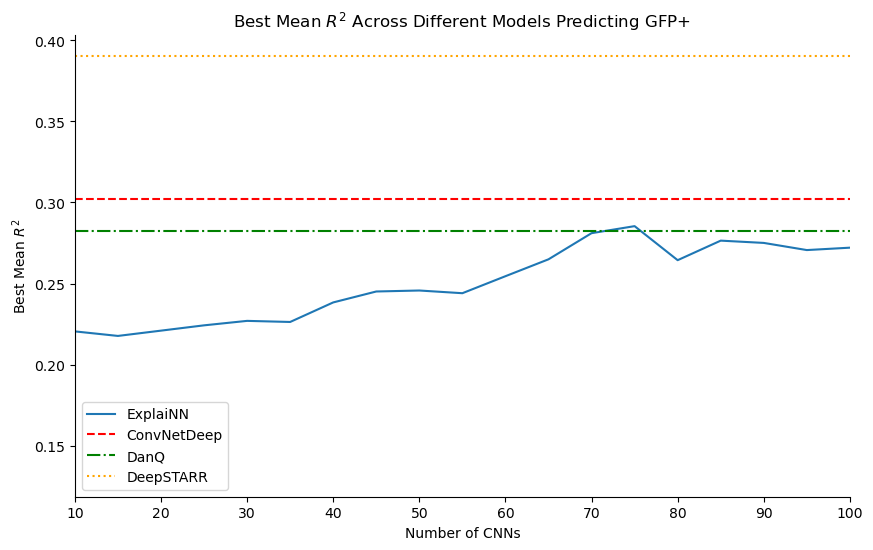

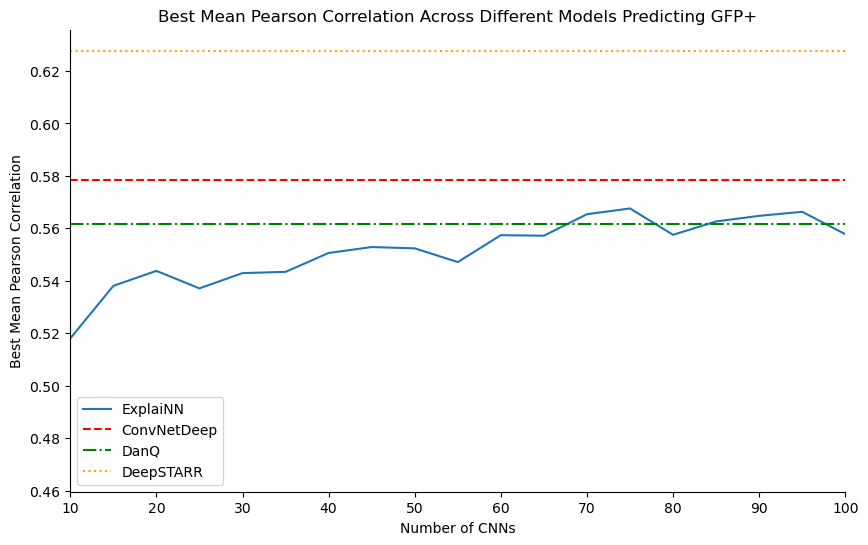

In [8]:
# Function to calculate the highest mean r2_r for each num_cnns
def calculate_highest_mean_explain(df, metric):
    grouped = df.groupby(['num_cnns', 'batch', 'lr']).agg(mean_metric=(metric, 'mean')).reset_index()
    return grouped.groupby('num_cnns')['mean_metric'].max()

# Function to calculate the highest mean r2_r for dataframes without num_cnns
def calculate_highest_mean_others(df, metric):
    grouped = df.groupby(['batch', 'lr']).agg(mean_metric=(metric, 'mean')).reset_index()
    return grouped['mean_metric'].max()

# Assuming the calculation functions and data frame preparations are already defined
# as provided in your previous messages

# Apply the function to df_explain and other data frames
df_explain_highest = calculate_highest_mean_explain(df_explain,'r2_r')
max_r2_conv = calculate_highest_mean_others(df_conv,'r2_r')
max_r2_dan = calculate_highest_mean_others(df_dan,'r2_r')
max_r2_starr = calculate_highest_mean_others(df_starr,'r2_r')

# Function to calculate the highest mean r2_r for each num_cnns
def calculate_highest_mean_explain(df, metric):
    grouped = df.groupby(['num_cnns', 'batch', 'lr']).agg(mean_metric=(metric, 'mean')).reset_index()
    return grouped.groupby('num_cnns')['mean_metric'].max()

# Function to calculate the highest mean r2_r for dataframes without num_cnns
def calculate_highest_mean_others(df, metric):
    grouped = df.groupby(['batch', 'lr']).agg(mean_metric=(metric, 'mean')).reset_index()
    return grouped['mean_metric'].max()

# Assuming the calculation functions and data frame preparations are already defined
# as provided in your previous messages

# Apply the function to df_explain and other data frames
df_explain_highest = calculate_highest_mean_explain(df_explain,'r2_r')
max_r2_conv = calculate_highest_mean_others(df_conv,'r2_r')
max_r2_dan = calculate_highest_mean_others(df_dan,'r2_r')
max_r2_starr = calculate_highest_mean_others(df_starr,'r2_r')

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_explain_highest.index, df_explain_highest.values, label='ExplaiNN', linestyle='-', markersize=3)
plt.axhline(y=max_r2_conv, color='red', linestyle='--', label='ConvNetDeep')
plt.axhline(y=max_r2_dan, color='green', linestyle='-.', label='DanQ')
plt.axhline(y=max_r2_starr, color='orange', linestyle=':', label='DeepSTARR')

plt.title('Best Mean $R^2$ Across Different Models Predicting GFP+')
plt.xlabel('Number of CNNs')
plt.ylabel('Best Mean $R^2$')
plt.legend()
plt.grid(False)  # Disable the grid
plt.gca().set_facecolor('white')  # Set background to white
plt.xlim(10,100)  # Set x-axis limits
#plt.ylim(0.36, 0.42)  # Set y-axis limits

# Remove the top and right spines (borders)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

# Apply the function to df_explain and other data frames
df_explain_highest = calculate_highest_mean_explain(df_explain,'pearson_corr_r')
max_pearson_conv = calculate_highest_mean_others(df_conv,'pearson_corr_r')
max_pearson_dan = calculate_highest_mean_others(df_dan,'pearson_corr_r')
max_pearson_starr = calculate_highest_mean_others(df_starr,'pearson_corr_r')

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_explain_highest.index, df_explain_highest.values, label='ExplaiNN', linestyle='-', markersize=3)
plt.axhline(y=max_pearson_conv, color='red', linestyle='--', label='ConvNetDeep')
plt.axhline(y=max_pearson_dan, color='green', linestyle='-.', label='DanQ')
plt.axhline(y=max_pearson_starr, color='orange', linestyle=':', label='DeepSTARR')

plt.title('Best Mean Pearson Correlation Across Different Models Predicting GFP+')
plt.xlabel('Number of CNNs')
plt.ylabel('Best Mean Pearson Correlation')
plt.legend()
plt.grid(False)  # Disable the grid
plt.gca().set_facecolor('white')  # Set background to white
plt.xlim(10,100)  # Set x-axis limits
#plt.ylim(0.61, 0.65)  # Set y-axis limits

# Remove the top and right spines (borders)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

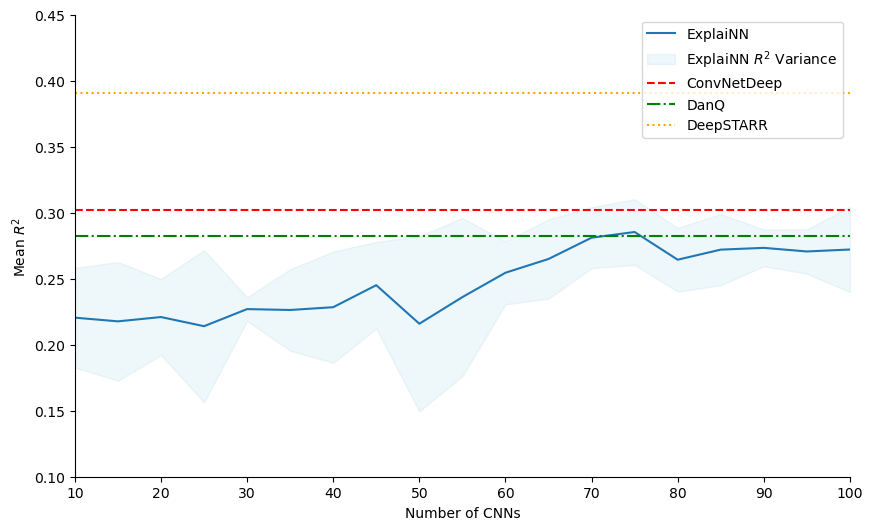

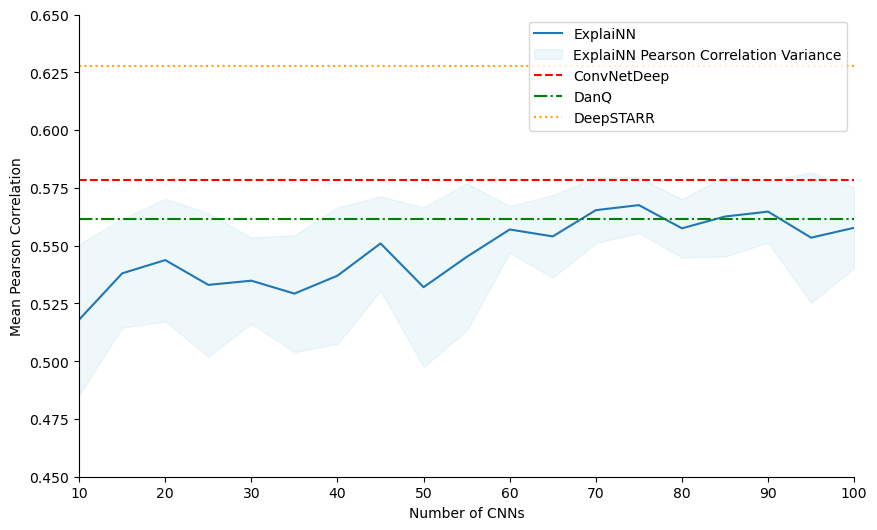

In [10]:
# Assuming your dataframe is named df_explain and it's already loaded

# Function to find the best combination of 'batch' and 'lr' for each 'num_cnns'
def find_best_combinations(df, metric):
    best_combinations = []
    for num_cnn in df['num_cnns'].unique():
        subset = df[df['num_cnns'] == num_cnn]
        subset = subset[subset[metric] > 0]  # Removing negative values
        if not subset.empty:
            best_comb = subset.loc[subset[metric].idxmax()][['batch', 'lr']]
            best_combinations.append((num_cnn, best_comb['batch'], best_comb['lr']))
    
    # Sort the best combinations by 'num_cnn' in ascending order
    best_combinations.sort(key=lambda x: x[0])
    
    return best_combinations

# Function to calculate mean and variance for the best combinations
def calculate_mean_variance(df, metric, best_combinations):
    mean_values = []
    variance_values = []
    for num_cnn, batch, lr in best_combinations:
        subset = df[(df['num_cnns'] == num_cnn) & (df['batch'] == batch) & (df['lr'] == lr)]
        mean_values.append(subset[metric].mean())
        variance_values.append(subset[metric].var())
    return mean_values, variance_values

# Find best combinations for r2_r
best_combinations_r2 = find_best_combinations(df_explain, 'r2_r')

# Calculate mean and variance for r2_r
mean_values_r2, variance_values_r2 = calculate_mean_variance(df_explain, 'r2_r', best_combinations_r2)

# Extract num_cnn values
num_cnns = [item[0] for item in best_combinations_r2]

# Apply the function to df_explain and other data frames
df_explain_highest = calculate_highest_mean_explain(df_explain,'r2_r')
max_pearson_conv = calculate_highest_mean_others(df_conv,'r2_r')
max_pearson_dan = calculate_highest_mean_others(df_dan,'r2_r')
max_pearson_starr = calculate_highest_mean_others(df_starr,'r2_r')

# Plotting mean and variance
plt.figure(figsize=(10, 6))
plt.plot(num_cnns, mean_values_r2, label='ExplaiNN', linestyle='-', markersize=3)
plt.fill_between(num_cnns, 
                 np.array(mean_values_r2) - np.sqrt(variance_values_r2), 
                 np.array(mean_values_r2) + np.sqrt(variance_values_r2), 
                 color='#ADD8E6', alpha=0.2, label='ExplaiNN $R^2$ Variance')

plt.axhline(y=max_r2_conv, color='red', linestyle='--', label='ConvNetDeep')
plt.axhline(y=max_r2_dan, color='green', linestyle='-.', label='DanQ')
plt.axhline(y=max_r2_starr, color='orange', linestyle=':', label='DeepSTARR')

#plt.title('Best Mean $R^2$ Across Different Models Predicting GFP+')
plt.xlabel('Number of CNNs')
plt.ylabel('Mean $R^2$')
plt.xlim(10,100)
plt.legend(loc='upper right', bbox_to_anchor=(1, 1))
plt.grid(False)  # Disable the grid
plt.gca().set_facecolor('white')  # Set background to white
plt.ylim(0.1, 0.45)  # Set y-axis limits

# Remove the top and right spines (borders)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()



# Find best combinations for pearson_r
best_combinations_pearson_corr_r = find_best_combinations(df_explain, 'pearson_corr_r')

# Calculate mean and variance for pearson_corr_r
mean_values_pearson_corr_r, variance_values_pearson_corr_r = calculate_mean_variance(df_explain, 'pearson_corr_r', best_combinations_pearson_corr_r)

# Extract num_cnn values
num_cnns = [item[0] for item in best_combinations_pearson_corr_r]

# Apply the function to df_explain and other data frames
df_explain_highest = calculate_highest_mean_explain(df_explain,'pearson_corr_r')
max_pearson_conv = calculate_highest_mean_others(df_conv,'pearson_corr_r')
max_pearson_dan = calculate_highest_mean_others(df_dan,'pearson_corr_r')
max_pearson_starr = calculate_highest_mean_others(df_starr,'pearson_corr_r')

# Plotting mean and variance
plt.figure(figsize=(10, 6))
plt.plot(num_cnns, mean_values_pearson_corr_r, label='ExplaiNN', linestyle='-', markersize=3)
plt.fill_between(num_cnns, 
                 np.array(mean_values_pearson_corr_r) - np.sqrt(variance_values_pearson_corr_r), 
                 np.array(mean_values_pearson_corr_r) + np.sqrt(variance_values_pearson_corr_r), 
                 color='#ADD8E6', alpha=0.2, label='ExplaiNN Pearson Correlation Variance')

plt.axhline(y=max_pearson_conv, color='red', linestyle='--', label='ConvNetDeep')
plt.axhline(y=max_pearson_dan, color='green', linestyle='-.', label='DanQ')
plt.axhline(y=max_pearson_starr, color='orange', linestyle=':', label='DeepSTARR')

#plt.title('Best Mean Pearson Correlation Across Different Models Predicting GFP+')
plt.xlabel('Number of CNNs')
plt.ylabel('Mean Pearson Correlation')
plt.xlim(10, 100)
plt.legend(loc='upper right', bbox_to_anchor=(1, 1))
plt.grid(False)  # Disable the grid
plt.gca().set_facecolor('white')  # Set background to white
plt.ylim(0.45, 0.65)  # Set y-axis limits

# Remove the top and right spines (borders)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()